# Green tea compounds in plasma

- using a QIIME2 2021.11 conda environment

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from qiime2 import Artifact, Visualization

from skbio.diversity import beta_diversity, alpha_diversity
from skbio.diversity.beta import unweighted_unifrac
from skbio.stats import distance, ordination
from skbio import DistanceMatrix

from sklearn.decomposition import PCA

%matplotlib inline

## Read in data

### Metadata

In [25]:
metadata = pd.read_csv("../metadata/mapping.tsv", sep="\t")
metadata.head()

,#SampleID,MetaboSampleID,Plate,Well,#,BarcodeSequence,LinkerPrimerSequence,BarcodeName,PID,Group,Study,DNA_Conc,Amplified_Conc,Extraction_Date,Extraction_Location,Extraction_By
0,GT.063_N,18,2,B07,48,TTAACAAGGCAA,GTGYCAGCMGCCGCGGTAA,515rcbc222,63,Red,Green Tea,15.3,62.55,10/13/21,BSC,MK
1,GT.063_R,3,1,E01,49,TGATGTGCTAAG,GTGYCAGCMGCCGCGGTAA,515rcbc48,63,Red,Green Tea,39.9,51.15,10/13/21,BSC,MK
2,GT.066_B,17,2,A09,54,CCAGGACAGGAA,GTGYCAGCMGCCGCGGTAA,515rcbc200,66,Red,Green Tea,18.6,67.90,10/13/21,BSC,MK
3,GT.066_N,29,1,F12,55,AACTCAATAGCG,GTGYCAGCMGCCGCGGTAA,515rcbc167,66,Red,Green Tea,32.9,41.80,10/13/21,BSC,MK
4,GT.074_N,2,2,C12,52,GATATACCAGTG,GTGYCAGCMGCCGCGGTAA,515rcbc227,74,Red,Green Tea,9.8,38.75,10/13/21,BSC,MK


In [26]:
metabo_metadata = metadata.set_index("MetaboSampleID")

### Aqueous metabolome fraction

In [27]:
aqueous = pd.read_csv("../metabolome/Aqueous_Green_Tea_compounds_in_Plasma_020722.txt",
                      sep="\t", header=11, index_col="Compound").T
aqueous.head()

Compound,L-ISOLEUCINE**_1.428,Adenosine_4.092,Rehmaionoside C_7.64,Phenyl pyruvic acid_1.827,Pipecolic acid_2.82,C11 - 0.839,C13 - 1.093,C15 - 0.838,Piperidine_1.424,L-leucyl-L-proline_2.533,...,C2252 - 0.847,Valyl-Tyrosine_6.482,C2327 - 6.957,C2340 - 0.797,C2409 - 8.239,Tryptophyl-Leucine_7.759,Taraxinic acid 1'-O-beta-D-glucopyranoside_6.684,Lactiflorin_7.997,C2556 - 6.454,Leucyl-phenylalanine_7.238
report.results_GT_001_SBAQ_1(raw),17712000.0,146348.17,6398.4355,10674177.0,5768.1445,12170999.0,88575.1,9003215.0,61180444.0,657187.5,...,16241.985,14520.984,7045.5303,48157.723,0.00001,13797.909,0.00001,0.00001,27817.25,0.00001
report.results_GT_001_SBAQ_10(raw),17035938.0,607119.7,1455.5625,5485058.0,0.00001,12346700.0,116277.28,9638772.0,57270492.0,838093.0,...,19492.068,8145.5244,15454.732,56170.39,6789.9565,30013.299,0.00001,12012.743,140034.2,2327.0073
report.results_GT_001_SBAQ_11(raw),20275532.0,1020185.25,3444.505,39494272.0,13877.56,14251298.0,67781.93,10477635.0,48008460.0,1061066.8,...,23296.305,1707.6627,14735.302,68097.46,0.00001,30760.3,6226.627,2626.8083,144762.81,2836.1697
report.results_GT_001_SBAQ_12(raw),15365725.0,1551649.2,0.00001,40230988.0,0.00001,11668012.0,62352.82,8724246.0,61709096.0,1035873.1,...,15679.882,1070.6887,15523.82,30887.729,616.637,26817.178,3865.2488,13227.847,129917.61,1829.9155
report.results_GT_001_SBAQ_13(raw),13433810.0,407411.6,29579.545,40273104.0,10662.446,13293888.0,43721.836,9790668.0,32929592.0,1351724.8,...,17213.516,4386.807,31494.248,93080.14,0.00001,14800.214,23253.973,0.00001,42364.594,22198.748


In [28]:
raw_indexes =        [x for x in list(aqueous.index) if ("Log2(normalized)" not in x)]
normalized_indexes = [x for x in list(aqueous.index) if ("(raw)" not in x)]

raw_aqueous = aqueous.loc[raw_indexes]
log_aqueous = aqueous.loc[normalized_indexes]

In [29]:
raw_aqueous.index = [int(x.split("SBAQ_")[-1][:-5]) if ("SBAQ_" in x)
                     else x 
                     for x in list(raw_aqueous.index)]

log_aqueous.index = [int(x.split("SBAQ_")[-1][:-18]) if ("SBAQ_" in x)
                     else x 
                     for x in list(log_aqueous.index)]

### Metabolome lipid fraction

In [30]:
lipid = pd.read_csv("../metabolome/Lipid_Green_Tea_compounds_in_Plasma_020722.txt",
                      sep="\t", header=11, index_col="Compound").T
lipid.head()

Compound,"MGDG(20:5(5Z,8Z,11Z,14Z,17Z)/18:4(6Z,9Z,12Z,15Z))_4.412","MGDG(18:3(9Z,12Z,15Z)/18:3(9Z,12Z,15Z))_5.129","PC(14:0/20:3(5Z,8Z,11Z))_4.716","PC(22:5(7Z,10Z,13Z,16Z,19Z)/14:0)_4.33",METHYL BETA-D-GALACTOSIDE**_0.414,"PA(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/22:2(13Z,16Z))_5.211","MGDG(20:5(5Z,8Z,11Z,14Z,17Z)/18:4(6Z,9Z,12Z,15Z))_4.32",C24 - 2.571,C26 - 3.214,"MGDG(18:2(9Z,12Z)/18:3(9Z,12Z,15Z))_5.533",...,C1767 - 1.635,Mannosyl-1beta-phosphomycoketide C32_6.516,C1772 - 2.203,C1775 - 6.974,Enalkiren_3.446,C1788 - 2.23,"PA(22:4(7Z,10Z,13Z,16Z)/21:0)_7.796",C1791 - 6.911,PG(17:1(9Z)/12:0)_3.854,C1802 - 1.092
report.results_GT_001_Lipid_1(raw),123458.85,6465828.0,11755339.0,1834489.8,122245.766,103096.06,126109.484,70565.21,98298.47,701912.44,...,77175.2,86081.266,21798.504,144493.11,35579.188,64894.977,12877.633,25663.674,40787.43,96877.79
report.results_GT_001_Lipid_10(raw),57086.8,8076250.0,2574086.8,1366190.9,91752.41,455115.38,55665.836,17106.846,37209.902,871031.7,...,75847.195,192845.1,32461.479,50819.875,55295.19,45620.074,41866.945,18297.928,22361.209,591896.94
report.results_GT_001_Lipid_11(raw),75968.305,6232196.5,3228597.5,1775793.1,164705.14,304191.0,79968.3,5382.238,3980.5962,679151.75,...,73047.81,95249.44,23539.396,73425.69,61335.047,68689.91,45314.484,107591.984,32179.262,525234.0
report.results_GT_001_Lipid_12(raw),40424.945,8737200.0,11179583.0,2147404.2,113370.95,469620.56,39896.1,5930.5845,23645.172,919269.9,...,76264.88,1981478.4,53140.465,8387.661,47049.875,40646.242,44129.113,46670.71,40993.27,975717.0
report.results_GT_001_Lipid_13(raw),78125.07,6155770.5,6947831.5,1633273.5,89395.72,369602.88,81217.79,19604.162,33629.78,657940.25,...,86367.96,133077.25,22941.072,57134.555,29504.742,48089.707,19964.426,20215.764,35330.617,35483.203


In [31]:
raw_lipid_indexes =        [x for x in list(lipid.index) if ("Log2(normalized)" not in x)]
normalized_lipid_indexes = [x for x in list(lipid.index) if ("(raw)" not in x)]

raw_lipid = lipid.loc[raw_lipid_indexes]
log_lipid = lipid.loc[normalized_lipid_indexes]

In [32]:
raw_lipid.index = [int(x.split("Lipid_")[-1][:-5]) if ("Lipid_" in x)
                     else x 
                     for x in list(raw_lipid.index)]

log_lipid.index = [int(x.split("Lipid_")[-1][:-18]) if ("Lipid" in x)
                     else x 
                     for x in list(log_lipid.index)]

In [33]:
metabo_info_cols = ['Compound Name','Retention Time', 'Measured Retention Time', 
                    'Product Mass','QualifierMass', 'CASNumber', 
                    'CompoundType', 'ISTDCompoundName', 'Mass Column']

### Microbiome

In [34]:
microbiome = Artifact.load("../microbiome/tax_filtered_GT.qza").view(pd.DataFrame)

In [35]:
tax = Artifact.load("../microbiome/taxonomy_GT.qza").view(pd.DataFrame)
tax = tax.to_dict()["Taxon"]
microbiome.rename(columns=tax, inplace=True) # map OTUs to taxonomy name

In [36]:
microbiome_mat = np.matrix(microbiome)
microbiome_mat /= microbiome_mat.sum(axis=1) #convert to relative abundances

microbiome = pd.DataFrame(microbiome_mat, columns=microbiome.columns, index=microbiome.index)

In [57]:
microbiome_index_mapper = metadata.set_index("#SampleID")["MetaboSampleID"].to_dict()

new_microbiome_index = [int(microbiome_index_mapper[x]) for x in list(microbiome.index)]
microbiome.index = new_microbiome_index
microbiome = microbiome.sort_index()

## Analysis

### Metabolome beta diversity

### PCA

In [37]:
aqueous_pca = PCA(n_components=3)
aqueous_pca_res = aqueous_pca.fit_transform(raw_aqueous.drop(metabo_info_cols, 
                                                             axis=0).reindex(metabo_metadata.index))

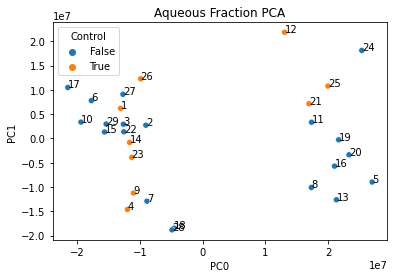

In [49]:
ax = sns.scatterplot(x=aqueous_pca_res[:,0], y=aqueous_pca_res[:,1],
                     hue=metabo_metadata["PID"]=="Control")
ax.set(xlabel="PC0", ylabel="PC1", title="Aqueous Fraction PCA")
plt.legend(title="Control")

for i, name in enumerate(metabo_metadata.index):
    ax.text(x=aqueous_pca_res[i,0],
            y=aqueous_pca_res[i,1],
            s=name)

**To see if 12, 25, and 21** look a certain way with the microbiome...

In [51]:
Visualization.load("../microbiome/core-metrics/taxa-bar-GT.qzv")

<visualization: Visualization uuid: f572ae2a-0689-481d-aa0c-ae38dada7250>

In [54]:
metabo_metadata.loc[[12,25,21]]

,#SampleID,Plate,Well,#,BarcodeSequence,LinkerPrimerSequence,BarcodeName,PID,Group,Study,DNA_Conc,Amplified_Conc,Extraction_Date,Extraction_Location,Extraction_By
MetaboSampleID,,,,,,,,,,,,,,,
12,GT.GFR_CO,2,C06,59,TGGTGGAGTTTC,GTGYCAGCMGCCGCGGTAA,515rcbc221,Control,Orange,Green Tea,12.3,54.7,10/13/21,BSC,MK
25,GT.GFB_C.R,2,F03,47,CACCCTTGCGAC,GTGYCAGCMGCCGCGGTAA,515rcbc254,Control,Red,Green Tea,6.0,76.0,10/13/21,BSC,MK
21,GT.GFL_CO,2,F06,60,TCGCTACAGATG,GTGYCAGCMGCCGCGGTAA,515rcbc257,Control,Orange,Green Tea,3.0,48.1,10/13/21,BSC,MK


**Doesn't look like they're the "different" controls**

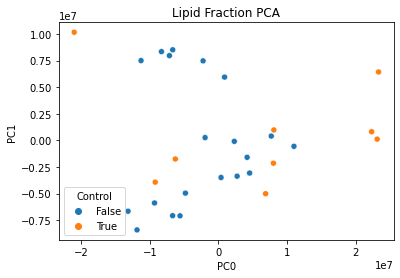

In [39]:
lipid_pca = PCA(n_components=3)
lipid_pca_res = lipid_pca.fit_transform(raw_lipid.drop(metabo_info_cols, 
                                                             axis=0).reindex(metabo_metadata.index))

ax = sns.scatterplot(x=lipid_pca_res[:,0], y=lipid_pca_res[:,1],
                     hue=metabo_metadata["PID"]=="Control")
ax.set(xlabel="PC0", ylabel="PC1", title="Lipid Fraction PCA")
plt.legend(title="Control")

### PCoA with Bray Curtis

In [41]:
aqueous_bray = beta_diversity(metric="braycurtis",
                              counts=raw_aqueous.drop(metabo_info_cols, axis=0).reindex(metabo_metadata.index), 
                              ids=metabo_metadata.index)

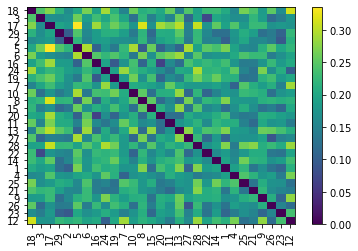

In [42]:
aqueous_bray

/Users/johnsterrett/mambaforge/envs/qiime2-2021.11/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.02221753578741084 and the largest is 0.20095390757708628.
  warn(


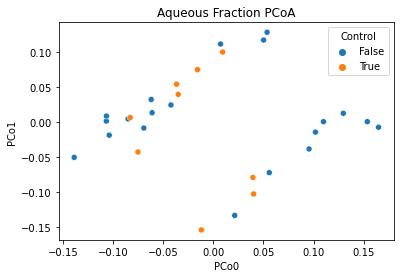

In [43]:
aqueous_pcoa_res = ordination.pcoa(aqueous_bray, number_of_dimensions=3)
ax = sns.scatterplot(x=aqueous_pcoa_res.samples["PC1"],
                     y=aqueous_pcoa_res.samples["PC2"],
                     hue=metabo_metadata["PID"]=="Control")
ax.set(xlabel="PCo0", ylabel="PCo1", title="Aqueous Fraction PCoA")
plt.legend(title="Control")

/Users/johnsterrett/mambaforge/envs/qiime2-2021.11/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.004372512892858705 and the largest is 0.24897841277437294.
  warn(


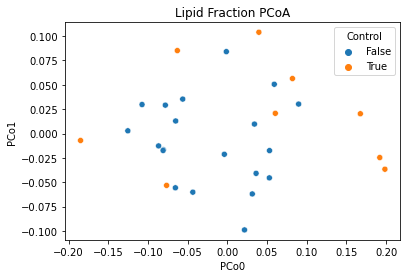

In [44]:
lipid_bray = beta_diversity(metric="braycurtis",
                              counts=raw_lipid.drop(metabo_info_cols, axis=0).reindex(metabo_metadata.index), 
                              ids=metabo_metadata.index)

lipid_pcoa_res = ordination.pcoa(lipid_bray, number_of_dimensions=3)
ax = sns.scatterplot(x=lipid_pcoa_res.samples["PC1"],
                     y=lipid_pcoa_res.samples["PC2"],
                     hue=metabo_metadata["PID"]=="Control")
ax.set(xlabel="PCo0", ylabel="PCo1", title="Lipid Fraction PCoA")
plt.legend(title="Control")

## What compounds are associated with microbiome composition?

In [185]:
raw_aqueous_samples = raw_aqueous.drop(metabo_info_cols).sort_index()
raw_lipid_samples = raw_lipid.drop(metabo_info_cols).sort_index()

In [85]:
microbiome_u_uni = Artifact.load("../microbiome/core-metrics/unweighted_unifrac_distance_matrix.qza").view(DistanceMatrix)

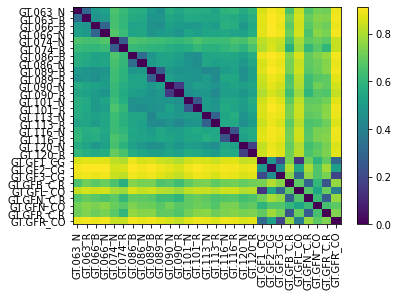

In [86]:
microbiome_u_uni

In [87]:
microbiome_u_uni_df = microbiome_u_uni.to_data_frame()

new_microbiome_u_uni_index = [int(microbiome_index_mapper[x]) for x in list(microbiome_u_uni_df.index)]
microbiome_u_uni_df.index = new_microbiome_u_uni_index
microbiome_u_uni_df = microbiome_u_uni_df.rename(index=microbiome_index_mapper, 
                                                 columns=microbiome_index_mapper)
microbiome_u_uni = DistanceMatrix(microbiome_u_uni_df, ids=microbiome_u_uni_df.index)

In [137]:
def make_euclidean_distance_matrix(data, ids):
    data = np.array(data)
    
    matrix_shape = (data.shape[0], data.shape[0])
    out_matrix = np.empty(matrix_shape)
    
    for i, entry in enumerate(data):
        for j, entry_2 in enumerate(data):
            if i==j:
                out_matrix[i,i] = 0
            elif i<j:
                diff = np.abs(entry_2 - entry)
                out_matrix[i,j] = diff
                out_matrix[j,i] = diff
                
            else:
                pass
    
    return DistanceMatrix(out_matrix, ids=ids)

### Aqueous

In [146]:
raw_aqueous_samples_index = raw_aqueous_samples.index
raw_aqueous_mantel_results_u = pd.DataFrame(index=raw_aqueous_samples.columns,
                                            columns=["corr","p"])

for col in raw_aqueous_samples.columns:
    metabo_dist_mat = make_euclidean_distance_matrix(raw_aqueous_samples[col], 
                                                     ids=raw_aqueous_samples_index)
    
    corr, p, n = distance.mantel(metabo_dist_mat, microbiome_u_uni, method="pearson")
    
    raw_aqueous_mantel_results_u.loc[col,"corr"] = corr
    raw_aqueous_mantel_results_u.loc[col,"p"] = p
    
    print("\n================================")
    print(f"Mantel on {col} and unweighted UniFrac:")
    print(f"corr = {corr}, p = {p}")


Mantel on L-ISOLEUCINE**_1.428 and unweighted UniFrac:
corr = -0.08832958621624176, p = 0.316

Mantel on Adenosine_4.092 and unweighted UniFrac:
corr = -0.04262349987080949, p = 0.661

Mantel on Rehmaionoside C_7.64 and unweighted UniFrac:
corr = 0.031793773537543056, p = 0.681

Mantel on Phenyl pyruvic acid_1.827 and unweighted UniFrac:
corr = -0.0844108174485836, p = 0.084

Mantel on Pipecolic acid_2.82 and unweighted UniFrac:
corr = 0.23062757556007324, p = 0.009

Mantel on C11 - 0.839 and unweighted UniFrac:
corr = -0.06895422822956636, p = 0.306

Mantel on C13 - 1.093 and unweighted UniFrac:
corr = 0.05476251205290808, p = 0.575

Mantel on C15 - 0.838 and unweighted UniFrac:
corr = -0.05853898767633912, p = 0.406

Mantel on Piperidine_1.424 and unweighted UniFrac:
corr = -0.004812948048622946, p = 0.938

Mantel on L-leucyl-L-proline_2.533 and unweighted UniFrac:
corr = -0.00038944345920080586, p = 0.997

Mantel on 5?-Deoxy-5?-(methylthio)adenosine_6.72 and unweighted UniFrac:
cor


Mantel on Succinoadenosine_6.288 and unweighted UniFrac:
corr = 0.0037346907890680537, p = 0.968

Mantel on Stachydrine_1.335 and unweighted UniFrac:
corr = -0.04015180344894206, p = 0.584

Mantel on Shikonofuran D_8.462 and unweighted UniFrac:
corr = 0.30964139487204156, p = 0.002

Mantel on 4-GUANIDINOBUTANOATE**_1.4 and unweighted UniFrac:
corr = 0.182936796952371, p = 0.02

Mantel on Leucyl-Hydroxyproline_2.237 and unweighted UniFrac:
corr = 0.05449451745207034, p = 0.567

Mantel on Vernoflexuoside_4.66 and unweighted UniFrac:
corr = -0.003480913907906046, p = 0.974

Mantel on C453 - 8.762 and unweighted UniFrac:
corr = -0.003098563441778235, p = 0.955

Mantel on Subaphyllin_6.307 and unweighted UniFrac:
corr = 0.14459390836669395, p = 0.072

Mantel on 1-Fluorocyclohexadiene-cis,cis-1,2-diol_2.279 and unweighted UniFrac:
corr = 0.030326609319247765, p = 0.771

Mantel on Psicofuranine_5.828 and unweighted UniFrac:
corr = -0.004600081622530106, p = 0.934

Mantel on C473 - 1.474 and 


Mantel on THEOPHYLLINE**_7.141 and unweighted UniFrac:
corr = 0.11427278520621467, p = 0.177

Mantel on Triacanthine_1.408 and unweighted UniFrac:
corr = -0.035001043247784754, p = 0.607

Mantel on Menisporphine_1.669 and unweighted UniFrac:
corr = 0.23980307292294692, p = 0.015

Mantel on C1115 - 2.507 and unweighted UniFrac:
corr = 0.013100352352038568, p = 0.871

Mantel on C1137 - 6.176 and unweighted UniFrac:
corr = 0.10185166454570697, p = 0.172

Mantel on 2-(1-Ethoxy-2-hydroxy)propyl-4-methoxyphenol_7.363 and unweighted UniFrac:
corr = -0.047673400191210524, p = 0.595

Mantel on Dopamine_2.414 and unweighted UniFrac:
corr = 0.2532705385808784, p = 0.003

Mantel on Methylanthranilate_1.703 and unweighted UniFrac:
corr = 0.08668307524310154, p = 0.284

Mantel on Acetylagmatine_2.216 and unweighted UniFrac:
corr = 0.6877626778439678, p = 0.001

Mantel on Taraxacolide 1-O-b-D-glucopyranoside_8.144 and unweighted UniFrac:
corr = 0.0847424941569071, p = 0.285

Mantel on Psicofuranine_

In [174]:
raw_aqueous_mantel_results_u["Avg Abundance"] = raw_aqueous_samples.sum(axis=0)/raw_aqueous_samples.shape[0]
raw_aqueous_mantel_results_u["P<0.05"] = raw_aqueous_mantel_results_u["p"]<0.05
raw_aqueous_mantel_results_u["Log10 Avg Abundance"] = raw_aqueous_mantel_results_u["Avg Abundance"].apply(lambda x: np.log10(x+0.0001))

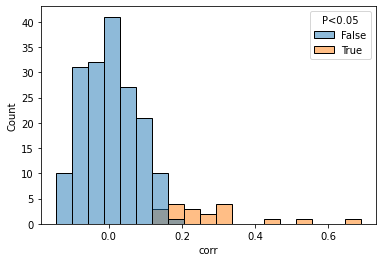

In [179]:
ax = sns.histplot(x = raw_aqueous_mantel_results_u["corr"], hue = raw_aqueous_mantel_results_u["P<0.05"])

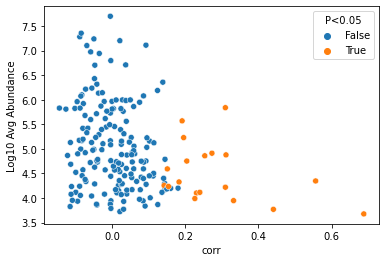

In [178]:
ax = sns.scatterplot(data=raw_aqueous_mantel_results_u,
                    x="corr",
                    y="Log10 Avg Abundance",
                    hue="P<0.05")

In [183]:
raw_aqueous_mantel_results_u[raw_aqueous_mantel_results_u["P<0.05"]].sort_values("corr", ascending=False)

,corr,p,Avg Abundance,P<0.05,Log10 Avg Abundance
Compound,,,,,
Acetylagmatine_2.216,0.687763,0.001,4731.414607,True,3.674991
C1287 - 5.388,0.556128,0.001,22172.437338,True,4.345813
Lactiflorin_7.997,0.44078,0.001,5865.543005,True,3.768308
L-Pyridosine_6.949,0.331932,0.003,8817.897746,True,3.945365
C943 - 3.968,0.311261,0.001,75293.593138,True,4.876758
Shikonofuran D_8.462,0.309641,0.002,16539.438106,True,4.218521
Clitidine_5.347,0.309533,0.001,687436.486897,True,5.837233
gamma-Glutamyl-alanine_1.2,0.272857,0.001,81400.845379,True,4.910629
Dopamine_2.414,0.253271,0.003,72141.413232,True,4.858185


In [181]:
raw_aqueous_mantel_results_u[raw_aqueous_mantel_results_u["P<0.05"]].sort_values("Avg Abundance")

,corr,p,Avg Abundance,P<0.05,Log10 Avg Abundance
Compound,,,,,
Acetylagmatine_2.216,0.687763,0.001,4731.414607,True,3.674991
Lactiflorin_7.997,0.44078,0.001,5865.543005,True,3.768308
L-Pyridosine_6.949,0.331932,0.003,8817.897746,True,3.945365
Ethyl-p-methoxycinnamate_8.596,0.226197,0.009,9732.955728,True,3.988245
Pipecolic acid_2.82,0.230628,0.009,12628.994611,True,4.101369
Menisporphine_1.669,0.239803,0.015,13006.262416,True,4.114153
Shikonofuran D_8.462,0.309641,0.002,16539.438106,True,4.218521
Mandelonitrile_6.399,0.154139,0.027,17136.260943,True,4.233916
Pyroglutamic acid_1.282,0.142092,0.021,17951.024816,True,4.254089


### Lipid

In [186]:
raw_lipid_samples_index = raw_lipid_samples.index
raw_lipid_mantel_results_u = pd.DataFrame(index=raw_lipid_samples.columns,
                                            columns=["corr","p"])

for col in raw_lipid_samples.columns:
    metabo_dist_mat = make_euclidean_distance_matrix(raw_lipid_samples[col], 
                                                     ids=raw_lipid_samples_index)
    
    corr, p, n = distance.mantel(metabo_dist_mat, microbiome_u_uni, method="pearson")
    
    raw_lipid_mantel_results_u.loc[col,"corr"] = corr
    raw_lipid_mantel_results_u.loc[col,"p"] = p

In [187]:
raw_lipid_mantel_results_u["Avg Abundance"] = raw_lipid_samples.sum(axis=0)/raw_lipid_samples.shape[0]
raw_lipid_mantel_results_u["P<0.05"] = raw_lipid_mantel_results_u["p"]<0.05
raw_lipid_mantel_results_u["Log10 Avg Abundance"] = raw_lipid_mantel_results_u["Avg Abundance"].apply(lambda x: np.log10(x+0.0001))

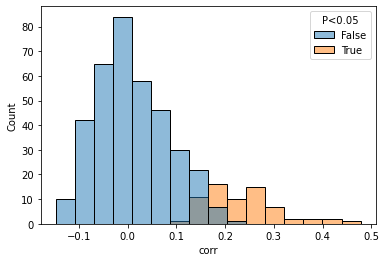

In [188]:
ax = sns.histplot(x = raw_lipid_mantel_results_u["corr"], hue = raw_lipid_mantel_results_u["P<0.05"])

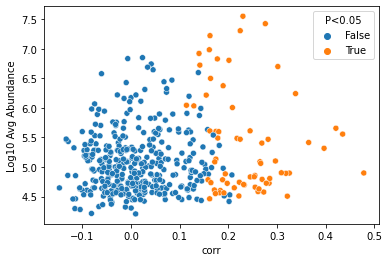

In [190]:
ax = sns.scatterplot(data=raw_lipid_mantel_results_u,
                    x="corr",
                    y="Log10 Avg Abundance",
                    hue="P<0.05")

In [196]:
raw_lipid_mantel_results_u[raw_lipid_mantel_results_u["P<0.05"]].sort_values("corr", ascending=False).head(20)

,corr,p,Avg Abundance,P<0.05,Log10 Avg Abundance
Compound,,,,,
C458 - 3.513,0.478011,0.001,79087.839483,True,4.898110
C846 - 4.744,0.434591,0.002,360006.759793,True,5.556311
"(22Z,24S)-Cerevisterol_4.476",0.420785,0.001,451926.535655,True,5.655068
"CL(22:5(7Z,10Z,13Z,16Z,19Z)/18:2(9Z,12Z)/22:5(7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z))_4.399",0.396481,0.001,206948.652966,True,5.315863
C1461 - 7.178,0.364886,0.001,259461.314328,True,5.414073
C1509 - 6.495,0.337923,0.003,1742868.905517,True,6.241265
"MGDG(20:5(5Z,8Z,11Z,14Z,17Z)/18:4(6Z,9Z,12Z,15Z))_4.412",0.325235,0.003,78839.512345,True,4.896744
C386 - 3.891,0.321089,0.006,32037.518,True,4.505659
"MGDG(20:5(5Z,8Z,11Z,14Z,17Z)/18:4(6Z,9Z,12Z,15Z))_4.32",0.318217,0.002,78046.566621,True,4.892354


One note from a quick google - Cerevisterol is a potent NF-kappa B inhibitor according to wikipedia